In [293]:
import numpy as np
import math
import matplotlib.pyplot as plt


In [294]:
# Reference link 0
L0 = 0

# Link 1
L1 = 1
angle = math.radians(45)

In [295]:
# Rotation Matrix
RM = matriz = np.array([
    [np.cos(angle), -np.sin(angle),   0],
    [np.sin(angle), np.cos(angle),   0],
    [0            ,  0            ,   1]
])

RM

array([[ 0.70710678, -0.70710678,  0.        ],
       [ 0.70710678,  0.70710678,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

In [296]:
# Reference transform
RefTransform = np.array([
    [1, 0, L0],
    [0, 1, 0],
    [0, 0, 1]
])

RefTransform

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [297]:
# link1 coordinate
x1 = matriz = np.array([
    [L1],
    [0],
    [1]
])
x1

array([[1],
       [0],
       [1]])

In [298]:
# link1 transform
T1 = np.dot(RefTransform,RM)
T1

array([[ 0.70710678, -0.70710678,  0.        ],
       [ 0.70710678,  0.70710678,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

In [299]:
x_world = np.dot(T1,x1)
x_world

array([[0.70710678],
       [0.70710678],
       [1.        ]])

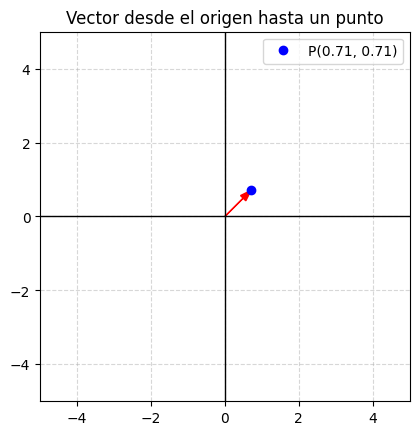

In [300]:
def printPoint(x,y):
   

    # -----------------------------
    # Create the figure
    # -----------------------------
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.grid(True, linestyle='--', alpha=0.5)

    # -----------------------------
    # Paint vector and point
    # -----------------------------
    # Vector from (0,0) to (x,y)
    ax.arrow(0, 0, x, y, head_width=0.2, head_length=0.3, fc='r', ec='r', length_includes_head=True)

    # Paint the point
    ax.plot(x, y, 'bo', label=f'P({x:.2f}, {y:.2f})')

    # -----------------------------
    # Add labels and axis
    # -----------------------------
    ax.axhline(0, color='black', lw=1)
    ax.axvline(0, color='black', lw=1)
    ax.legend()
    ax.set_title('Vector from origin to point')

    plt.show()

# -----------------------------
# Point Coordinates
# -----------------------------
printPoint(x_world[0,0], x_world[1,0])

# Define a Link class

In [301]:
class Link:
    def __init__(self, length, theta_deg, parent=None):
        """
        Constructor:
        - theta_deg: angle in degrees (relative to x axis or to parent link)
        - length   : link length
        - parent   : other link object (optional)
        """
        self.theta = math.radians(theta_deg)
        self.length = float(length)
        self.parent = parent
        
        # The link is defined by its its reference transform (related to its parent), 
        # its rotation matrix, and its coordinates
        
        
        if parent is None: # This link has no parent → its base is at the origin
            
            # Reference transform
            self.refTransform = np.array([
                [1, 0, 0],
                [0, 1, 0],
                [0, 0, 1]
            ])
            self.x0, self.y0 = 0.0, 0.0
            self.theta_base = 0
        else:
            # its base is in the end point of its parent link
            # Reference transform
            self.refTransform = np.array([
                [1,         0, self.parent.length],
                [0,         1,                  0],
                [0,         0,                  1]
            ])
            
        # Rotation Matrix
        self.rotationMatrix = matriz = np.array([
            [np.cos(self.theta), -np.sin(self.theta),   0],
            [np.sin(self.theta),  np.cos(self.theta),   0],
            [0                 ,                   0,   1]
        ])
        
        # link coordinate about x axis
        self.coordinates = matriz = np.array([
            [self.length],
            [0],
            [1]
        ])
        
    def calculateLinkTransform(self):
        
        if self.parent is None:
            return np.dot(self.refTransform,self.rotationMatrix)
        else:
            return np.dot(self.parent.calculateLinkTransform(),np.dot(self.refTransform,self.rotationMatrix))
        
    
    def calculateWorldCoordinates(self):
            return np.dot(self.calculateLinkTransform(),self.coordinates)

In [302]:
# ==============================================================
# Create a link using the class
# ==============================================================
link1 = Link(2/math.sqrt(2), 45)                      

In [303]:
print(f'Reference transform: \n{link1.refTransform}')
print(f'Rotation matrix: \n{link1.rotationMatrix}')
print(f'Link transform: \n{link1.calculateLinkTransform()}')
print(f'World coordinates: \n{link1.calculateWorldCoordinates()}')


Reference transform: 
[[1 0 0]
 [0 1 0]
 [0 0 1]]
Rotation matrix: 
[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]
Link transform: 
[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]
World coordinates: 
[[1.]
 [1.]
 [1.]]


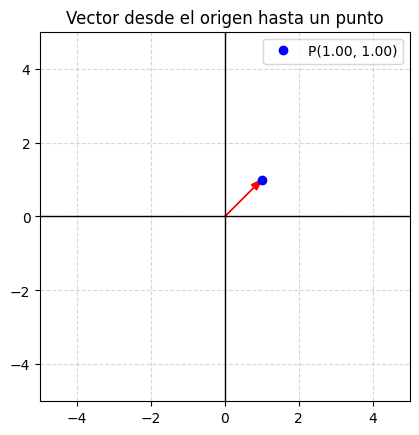

In [304]:
coordinates = link1.calculateWorldCoordinates()
printPoint(coordinates[0,0],coordinates[1,0])

In [305]:
# ==============================================================
# Create a set of links using the parent link
# ==============================================================
link1 = Link(3, 0)              # first link
link2 = Link(3, 45, link1)      # second link
link3 = Link(3, 45, link2)      # third link

links = [link1, link2, link3]

In [306]:
print(f'Reference transform: \n{links[2].refTransform}')
print(f'Rotation matrix: \n{links[2].rotationMatrix}')
print(f'Link transform: \n{links[2].calculateLinkTransform()}')
print(f'World coordinates: \n{links[2].calculateWorldCoordinates()}')


Reference transform: 
[[1. 0. 3.]
 [0. 1. 0.]
 [0. 0. 1.]]
Rotation matrix: 
[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]
Link transform: 
[[ 1.99673462e-16 -1.00000000e+00  5.12132034e+00]
 [ 1.00000000e+00  1.79380389e-16  2.12132034e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]
World coordinates: 
[[5.12132034]
 [5.12132034]
 [1.        ]]


In [307]:
print(f'reference transform: \n{links[0].refTransform}')
print(f'Rotation matrix: \n{links[0].rotationMatrix}')
print(f'World coordinates: \n{links[0].calculateWorldCoordinates()}')


reference transform: 
[[1 0 0]
 [0 1 0]
 [0 0 1]]
Rotation matrix: 
[[ 1. -0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
World coordinates: 
[[3.]
 [0.]
 [1.]]


In [308]:
print(f'reference transform: \n{links[1].refTransform}')
print(f'Rotation matrix: \n{links[1].rotationMatrix}')
print(f'World coordinates: \n{links[1].calculateWorldCoordinates()}')


reference transform: 
[[1. 0. 3.]
 [0. 1. 0.]
 [0. 0. 1.]]
Rotation matrix: 
[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]
World coordinates: 
[[5.12132034]
 [2.12132034]
 [1.        ]]


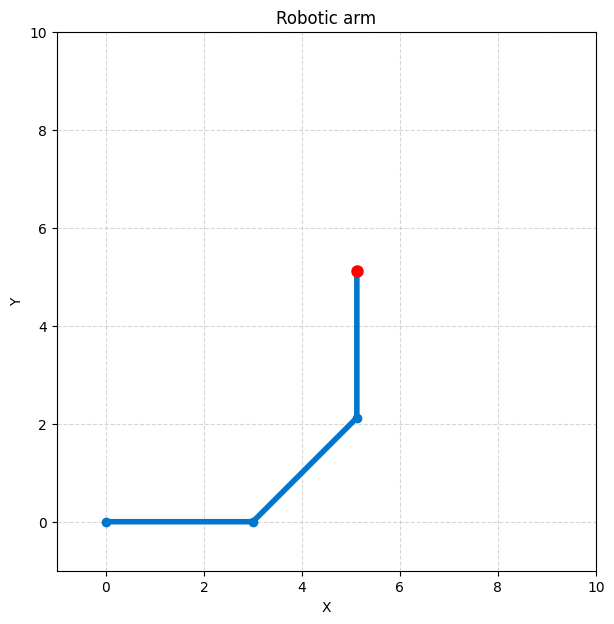

In [309]:
fig, ax = plt.subplots(figsize=(7, 7))

ax.set_aspect('equal', 'box')
ax.grid(True, linestyle='--', alpha=0.5)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Robotic arm")

ax.set_xlim(-1, 10)
ax.set_ylim(-1, 10)

(lineas,) = ax.plot([], [], lw=4, marker='o', color="#0077cc", markersize=6)
(end_dot,) = ax.plot([], [], 'o', color='red', markersize=8)

# Calculate chained positions
x_points = [0.0]
y_points = [0.0]

length_links = 0
for link in links:
    coordinates = link.calculateWorldCoordinates()
    x_points.append(coordinates[0,0])
    y_points.append(coordinates[1,0])
    length_links += link.length
    
# print arm
lineas.set_data(x_points, y_points)
end_dot.set_data([x_points[-1]], [y_points[-1]])
plt.show()
